<a href="https://colab.research.google.com/github/taunoe/jupyter-notebooks/blob/main/Juhendatud_%C3%B5pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*Praktilise näite autor: Ardi Tampuu*

## **Näide probleemist, kus küll saab juhendatud õpet kasutada, aga juhendamata õppe kasutamine annab parema tulemuse.**

Kasutame selles ülesandes andmestiku, mis koosneb 150 näitest. Näited vastavad 150 iirisele (lillele), mis kuuluvad 3 erinevasse alamliiki (*iris setosa*, *iris versicolor* ja *iris virginica*. Iga lille kohta teame kahte tunnust - õielehe pikkust ja tupplehe pikkust. Me teame ka iga lille alamliiki, aga selle ülesande jaoks proovime kasutada vaid osa märgenditest, justkui me ei teaks ülejäänusid. 

Püstitame probleemi järgnevalt: Me oleme aasalt kogunud 150 lille, mõõtnud nende õielehe ja tupplehe pikkused. Aga me ei tea, millised lilled kuuluvad millisesse kolmest võimalikust liigist. Selle jaoks on vaja targa bioloogi abi, aga ta läks puhkusele, olles ära määranud ainult 15 lille liigid 150st. Püüame leida viisi, kuidas tunnuste põhjal ka ülejäänud lilled ära klassifitseerida enne, kui bioloog tagasi tuleb. Kasutame selleks nii juhandatud kui juhendamata õpet. Hiljem, kui bioloog reisilt naaseb, saame teada, kas meie mudelid olid ka täpsed.
 


## 1. Andmetega tutvumine

Esmalt vaatame fotosid neist kolmest iiriseliigist:



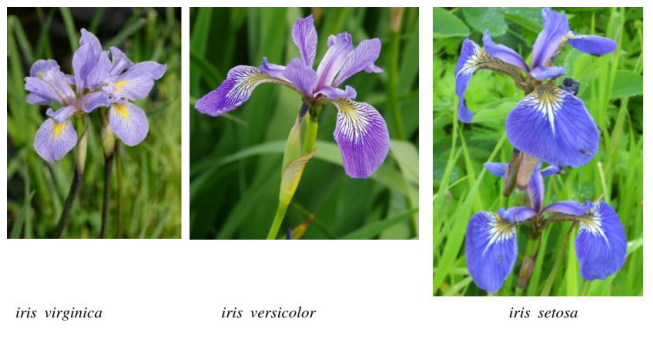

In [ ]:
# Kõigepealt laeme pildi meie kursuse serverist Google'i serverisse, et Colab selle üles leiaks
!wget --no-check-certificate https://courses.cs.ut.ee/2020/Tehisintellekti_algkursus/spring/uploads/Main/ml_praks_iirised.jpeg -O iirised.jpeg -q

# laeme mõned teegid (koodiraamatukogud), mis sisaldavad funktsioone piltide programmi
# sisse lugemiseks ja ekraanile joonistamiseks
import matplotlib.pyplot as plt 
from PIL import Image

img = Image.open('iirised.jpeg')
img = img.convert('RGB')

plt.figure(figsize=(12, 6))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Need lilled on tõesti üsna sarnased.

<br>

Meie andmed (pikkused ja märgendid) on kättesaadavad "sklearn"-i teegis. Järgnevas koodikastis loeme need oma programmi sisse. Seejärel joonistame kõigi 150 lille tunnused graafikule ja märgime ära nende 15 lille liigid, mida me teame.


<br>

Selle koodikasti väljundina tekib joonis, kus valged täpid vastavad lilledele, mille liiki me ei tea. Punased täpid vastavad *iris setosale*, sinised *iris versicolorile* ja mustad *iris virginicale*. 

Iiriseliikide nimed: ['setosa' 'versicolor' 'virginica']
Värvid samas järjekorras kui liiginimed: punane, sinine, must


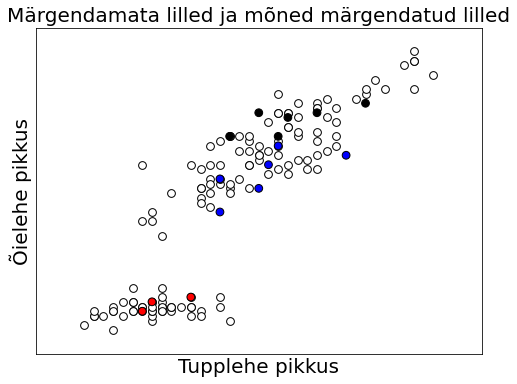

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors

# loeme andmestiku sisse
iris = datasets.load_iris()
tunnused = iris.data[:, 0::2]  # õielehed ja tupplehed
märgendid = iris.target
print("Iiriseliikide nimed:", iris.target_names)
print("Värvid samas järjekorras kui liiginimed: punane, sinine, must")

# parema visualiseerimise nimel defineerime värvid, mida joonisel tahame kasutada 
cmap = colors.ListedColormap(['red', 'blue','black'])
c_norm = colors.BoundaryNorm(boundaries=[0,1,2,3], ncolors=3)



#jagame andmed kaheks: 10% (15) puhul teame märgendit, 90% puhul teeskeleme, et ei tea
tunnused_train, tunnused_test, märgendid_train, märgendid_test = train_test_split(
     tunnused, märgendid, test_size=0.9, random_state=1)

plt.figure(figsize=(8, 6))

# joonistame kõik punktid, mille klassi me ei tea
plt.scatter(tunnused_test[:, 0], tunnused_test[:, 1], c="white", s=60,
            edgecolor='k')
plt.scatter(tunnused_train[:, 0], tunnused_train[:, 1], c=märgendid_train, cmap=cmap,norm=c_norm, s=60,
            edgecolor='k')

plt.title("Märgendamata lilled ja mõned märgendatud lilled", fontsize=20)
plt.xlabel('Tupplehe pikkus', fontsize=20)
plt.ylabel('Õielehe pikkus', fontsize=20)

x_min, x_max = tunnused[:, 0].min() - .5, tunnused[:, 0].max() + .5
y_min, y_max = tunnused[:, 1].min() - .5, tunnused[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


<br>

Jooniselt näeme, et märgendatud lillede seas on 3 *iris setosat* (kolm punast täppi), 6 *iris versicolorit* ja 6 *iris virginicat*.

*Setosad* on pigem väikeste tunnuseväärtustega, *versicolorid* keskmiste ja *virginicad* pikem pikkade õie- ja tupplehtedega.

<br>
<br>


## Juhendatud õppe mudeli loomine

Kasutame nüüd **otsustuspuu** mudelit, et nende 15 märgendatud punkti abil õppida erinevaid iiriseliike eristama. Erinevalt loengust ei pea me seekord ise välja mõtlema, milliseid otsuseid puusse lisada. Kogu puu loomise ja otsuste välja mõtlemise ja läbi katsetamise teeb meie eest juba teiste, tarkade inimeste poolt kirjutatud kood. See kood on avalikuks tehtud ja sellele saame ligi kasutades "sklearn" teeki (vabalt kättesaadav "koodiraamatukogu").

Selles koodikastis 
- loome "tühja" (ilma otsusteta) otsustuspuu,
- algoritm lisab puusse märgendatud näidete põhjal loodud otsused (fit funktsioon)
- laseme mudelil ennustada väljundeid **treeningnäidetel** ja võrdleme neid märgenditega. Arvutame mudeli **treening-täpsuse** (täpsuse neil 15 näitel, millel treenisime).


In [ ]:
# laeme teegist alla vajalikud funktsioonid
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

otsustuspuu = DecisionTreeClassifier(random_state=0) #loome puu
otsustuspuu.fit(tunnused_train, märgendid_train) # treenime puud oma märgendatud andmetel

print("Selle otsustuspuu täpsus treenimiseks kasutatud 15 näitel on: ", 100*otsustuspuu.score(tunnused_train, märgendid_train), "protsenti")


Selle otsustuspuu täpsus treenimiseks kasutatud 15 näitel on:  100.0 protsenti


100 % täpsus kõlab paljulubavalt, aga teame, et masinõppe mudelitel on oht ülesobituda. Meil oli kasutada ainult 15 näidet, võibolla ei üldistu neil õpitud reeglid ülejäänud lilledele.

Seda saame teada siis kui bioloog naaseb ja ütleb, mis ülejäänud lillede liigid tegelikult on.

Senikaua võime lihtsalt rakendada oma otsustuspuud veel märgendamata andmetele ja ennustused visualiseerida:

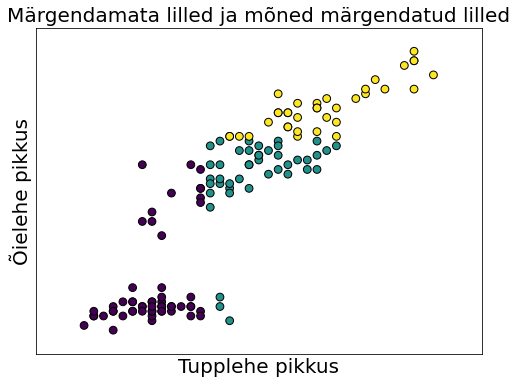

In [ ]:
plt.figure(figsize=(8, 6))

ennustused = otsustuspuu.predict(tunnused_test)
# joonistame kõik punktid, mille klassi me ei tea
plt.scatter(tunnused_test[:, 0], tunnused_test[:, 1], c=ennustused, s=60,
            edgecolor='k')


plt.title("Märgendamata lilled ja mõned märgendatud lilled", fontsize=20)
plt.xlabel('Tupplehe pikkus', fontsize=20)
plt.ylabel('Õielehe pikkus', fontsize=20)

x_min, x_max = tunnused[:, 0].min() - .5, tunnused[:, 0].max() + .5
y_min, y_max = tunnused[:, 1].min() - .5, tunnused[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Juhendamata õpe

Nüüd proovime ka võrdluseks juhendamata õpet, mis võimaldab meil tunnuste põhjal lilled gruppideks jaotada. Kuigi me ei tea, mis liigist on iga näide, saame ikkagi rakendada **juhendamata õppe** meetodeid, sest need ei vaja märgendatud andmeid. 

Me teame, et iiriseid on kolme tüüpi, samuti teame iga isendi tunnuseid. Me võime proovida lilled oma mõõtude järgi kolme gruppi jagada. Loodame, et need grupid, mida klasterdamisalgoritm (ilma märgendeid teadmata) meile loob, vastavad tegelikele iirise alamliikidele. 

Gruppide loomiseks saab kasutada näiteks K-keskmiste klasterdamisalgorimi. Anname klasterdamisalgoritmile ette, et gruppe peab olema 3, sest teame, et alamliike on 3. Seda meetodit kasutame ka 6. nädala materjalides ja seal tutvustame selle töötamist detailselt. Siinkohal lihtsalt kasutame seda meetodit ja vaatame, millised tulemused saame.

Selle koodikasti käima paneku tulemusena:
- luuakse k-keskmiste mudel,
- see mudel käib läbi andmed ja leiab, mis on tunnuste põhjal optimaalne viis näited kolme gruppi jagada,
- visualiseerime andmepunktid, märkides värviga selle, millisesse gruppi meie juhendamata õppe mudel iga punkti määras.

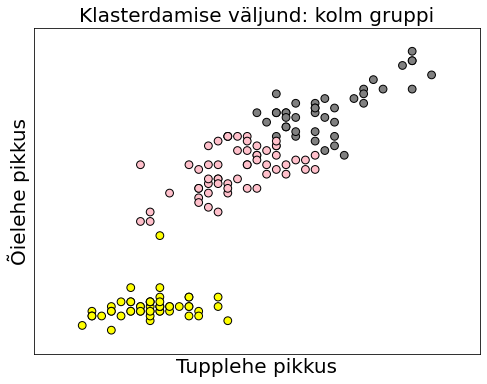

In [ ]:
from sklearn.cluster import KMeans

#valime uued värvid, et need oleks erinevad eelmistest
klastri_cmap = colors.ListedColormap(['yellow', 'pink','gray'])


klasterdaja = KMeans(n_clusters=3, random_state=3) #loome mudeli, öeldes, et tahame kolme klastrit
klasterdaja.fit(tunnused) #optimeerime mudelit tunnuste peal (leiame grupid)
klastrid = klasterdaja.labels_ #iga näite jaoks number, millisesse gruppi ta kuulub

plt.figure(figsize=(8, 6))

#joonistame punktid ja nende klastrisse kuuluvuse
plt.scatter(tunnused[:, 0], tunnused[:, 1], c=klastrid,cmap=klastri_cmap,norm=c_norm, s=60,
            edgecolor='k')
plt.xlabel('Tupplehe pikkus', fontsize=20)
plt.ylabel('Õielehe pikkus', fontsize=20)
plt.title("Klasterdamise väljund: kolm gruppi",fontsize=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Proovime nüüd need grupid panna vastavusse lilleliikidega. Selle jaoks on meil meie 15 märgendatud lille.

Järgnevas koodikastis visualiseerime uuesti oma klasterdamise tulemuse ja toome eraldi välja 15 meile teada-oleva märgendiga punkti.


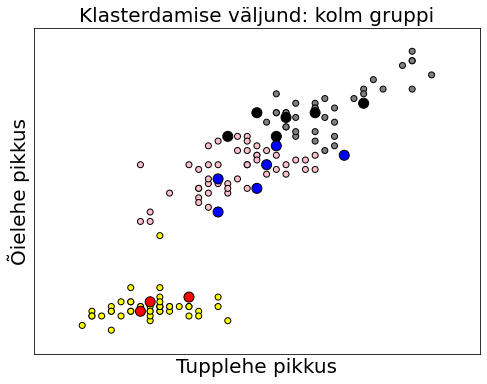

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(8, 6))
plt.scatter(tunnused[:, 0], tunnused[:, 1], c=klastrid,cmap=klastri_cmap,norm=c_norm,
            edgecolor='k')
plt.scatter(tunnused_train[:, 0], tunnused_train[:, 1], c=märgendid_train,cmap=cmap,norm=c_norm,s=100,
            edgecolor='k')
plt.xlabel('Tupplehe pikkus', fontsize=20)
plt.ylabel('Õielehe pikkus', fontsize=20)
plt.title("Klasterdamise väljund: kolm gruppi",fontsize=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Näeme, et punased märgendatud puktid sobituvad alumise kollase klastriga. Sinised märgendatud punktid asuvad roosa klastriga sarnases kohas ning mustad on kohakuti hallide märgendamata punktidega.

Otsustame, et me ennustame märgendamata punktid just selliselt -- kollase klastri märgendiks paneme *setosa*, roosade märgendiks *versicolor* ja hallide märgendiks *virginica*.



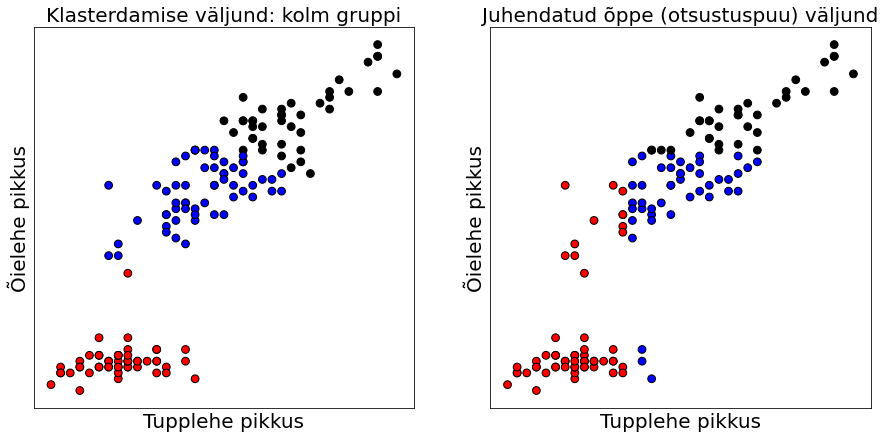

In [ ]:
klastri_cmap = colors.ListedColormap(['red', 'blue','black'])


klasterdaja = KMeans(n_clusters=3, random_state=3) #loome mudeli
klasterdaja.fit(tunnused) #optimeerime mudelit tunnuste peal (leiame grupid)
klastrid = klasterdaja.labels_ #iga näite jaoks number, millisesse gruppi ta kuulub


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))

#joonistame punktid ja nende klastrisse kuuluvuse
ax1.scatter(tunnused[:, 0], tunnused[:, 1], c=klastrid,cmap=klastri_cmap,norm=c_norm, s=60,
            edgecolor='k')
ax1.set_xlabel('Tupplehe pikkus', fontsize=20)
ax1.set_ylabel('Õielehe pikkus', fontsize=20)
ax1.set_title("Klasterdamise väljund: kolm gruppi",fontsize=20)
#axs[0].xlim(x_min, x_max)
#axs[0].ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

#joonistame punktid ja nende klastrisse kuuluvuse
ax2.scatter(tunnused_test[:, 0], tunnused_test[:, 1], c=ennustused,cmap=klastri_cmap,norm=c_norm, s=60,
            edgecolor='k')
ax2.set_xlabel('Tupplehe pikkus', fontsize=20)
ax2.set_ylabel('Õielehe pikkus', fontsize=20)
ax2.set_title("Juhendatud õppe (otsustuspuu) väljund",fontsize=20)
#axs[1].xlim(x_min, x_max)
#axs[1].ylim(y_min, y_max)
ax2.set_xticks(())
ax2.set_yticks(())


plt.show()

## Bioloog naaseb!

Bioloog naaseb ja saame teada kõikide lillede liigi (ÕIGE VASTUSE). Saame nüüd kontrollida, kui täpsed meie 

1) juhendatud õppe (otsustuspuu)

 ning 2) juhendamata õppe (esmalt klasterda, siis anna klastritele nimed)

mudelid kokkuvõttes olid. Selleks võrdleme nende kahe mudeli ennustusi tegelike märgenditega.

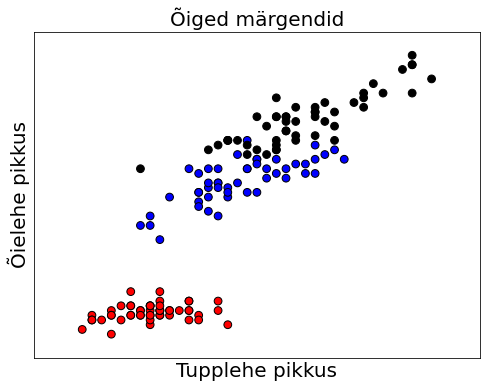

Juhendatud mudeli kesmine täpsus 135 valideerimis-näite peal on  82.22222222222221  protsenti.
See tähendab, et me eksisime  24 korral
Klasterdamisel baseeruva mudeli kesmine täpsus 135 uue näite peal on  88.14814814814815 protsenti.
See tähendab, et me eksisime  17 korral


In [ ]:
# joonistame kõik punktid, värvima nad vastavalt märgendile (liigile)
plt.figure(figsize=(8, 6))
plt.scatter(tunnused[:, 0], tunnused[:, 1], c=märgendid, cmap=cmap,norm=c_norm, s=60,
            edgecolor='k')

# Pealkiri ja telgede nimed
plt.xlabel('Tupplehe pikkus', fontsize=20)
plt.ylabel('Õielehe pikkus', fontsize=20)
plt.title("Õiged märgendid", fontsize=20)

#järgnevad read määravad joonise telgede pikkused
x_min, x_max = tunnused[:, 0].min() - .5, tunnused[:, 0].max() + .5
y_min, y_max = tunnused[:, 1].min() - .5, tunnused[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

val_acc = otsustuspuu.score(tunnused_test,märgendid_test) #validerimistäpsuse arvutamine

print("Juhendatud mudeli kesmine täpsus 135 valideerimis-näite peal on ", 100*val_acc," protsenti.")
print("See tähendab, et me eksisime ", int(135*(1-val_acc)), "korral")

kk=klasterdaja.predict(tunnused_test)
print("Klasterdamisel baseeruva mudeli kesmine täpsus 135 uue näite peal on ", 100*np.mean(kk==märgendid_test),"protsenti.")
print("See tähendab, et me eksisime ", int(150*(1-np.mean(kk==märgendid_test))), "korral")




Näeme, et neil näidetel eksivad mõlemad mudelid korduvalt, aga ***juhendamata õppel (klasterdamisel) baseeruv mudel teeb 7 viga vähem***. Seega, vaatamata 100%lisele täpsusele treeningandmetel, osutus juhendatud õppega treenitud (otsustuspuu) mudel uutel andmetel hoopis vähem täpseks. See mudel ülesobitus.

Järgmises kastis visualiseerime, milliste valideerimisnäidete puhul meie mudelid vigu tegid. Siin näites me piirdume ainult vigade visualiseerimisega ja nende paigutusest järeldusi tegema ei hakka. Tegelikus andmeteadlase töös on vigade analüüsimine on tegelikult väga oluline. See aitab mõista, mida mudel ei mõista või millest see on valest aru saanud. See omakorda võimaldab mudelit või õppimisprotsessi muuta, lisada või eemaldada sisendtunnuseid või otsustada, milliseid lisaandmeid koguda.


<Figure size 432x288 with 0 Axes>

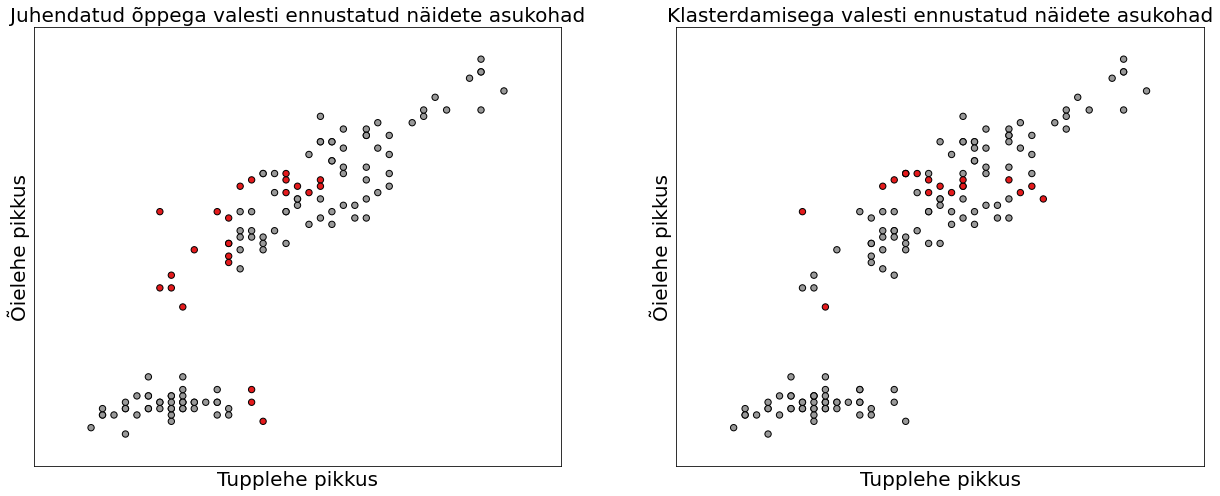

In [ ]:
plt.clf()

fig, (ax2, ax1) = plt.subplots(1,2,figsize=(18,7))

# Visualiseerime, kus mudel eksis
ax1.scatter(tunnused[:, 0], tunnused[:, 1], c=märgendid==klastrid, cmap=plt.cm.Set1,s=40,
            edgecolor='k')
ax1.set_xlabel('Tupplehe pikkus', fontsize=20)
ax1.set_ylabel('Õielehe pikkus', fontsize=20)
ax1.set_title("Klasterdamisega valesti ennustatud näidete asukohad", fontsize=20)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

ennustused = otsustuspuu.predict(tunnused_test)
# Plot the training points
ax2.scatter(tunnused_test[:, 0], tunnused_test[:, 1], c=märgendid_test==ennustused, cmap=plt.cm.Set1,s=40,
            edgecolor='k')
ax2.set_xlabel('Tupplehe pikkus', fontsize=20)
ax2.set_ylabel('Õielehe pikkus', fontsize=20)
ax2.set_title("Juhendatud õppega valesti ennustatud näidete asukohad", fontsize=20)
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_xticks(())
ax2.set_yticks(())
plt.tight_layout()
plt.show()

**Kokkuvõttes** saavutasime parema tulemuse, kui esmalt ***kasutasime kõiki olemasolevaid andmeid*** ja otsisime viisi, kuidas need andmepunktid kolmeks jagada. Alles siis otsustasime, millisele liigile iga grupp vastata võiks.

Selles praktilises ülesandes nägime, et kuna meil oli väga vähe näited, mille märgendit me teadsime, siis oli juhendatud õppe mudelitega raske head klassifitseerimis-mudelit õppida. Kuna meil oli samaaegselt veel hulk märgendamata andmeid, siis saime esmalt kasutada klasterdamist. See võimaldas jagada näited sarnaste tunnustega näideta gruppidesse ilma märgendeid kasutamata. Seejärel saime 15 teada-olevat lille kasutades panna juhendamata õppe teel leitud klastritele külge liiginimed ning kasutada neid ennustustena.

Selline olukord, kus märgendeid lihtsalt pole ei ole haruldane. Toome kaks näidet:

1) Kauplus soovib oma kliente gruppidesse jaotada. On variant hakata klientide ostude ajalugu käsitsi läbi vaatama ja neid märgendama mingitesse gruppidesse, näiteks "olulised kliendid" ja "mitte-olulised kliendid". Et iga kliendi kohta võib olla palju andmeid, on see töömahukas. Kui koos on vähemalt mõnedsajad märgendatud kliendid (kui palju märgendatud punkte on vaja hea mudeli jaoks, sõltub (a) tunnuste arvust ja (b) klasside arvust, millesse klassifitseerime), saaks neil treenida juhendatud õppe mudeli. ***Alternatiiv*** on kasutada juhendamata õpet. Nii saab kasutada kõiki andmeid, mitte ainult neid mida märgendada jaksasime ja suutsime. Seejärel võtame igast klastrist paar näidet ja märgendame need, et anda klastritele "nimi" või tähendus. 

Lisaboonusena annab klasterdamine tihti selliseid gruppe, mille peale me ise tulnud ei oleks - näiteks võime avastada klientide hulgast grupi väga spetsiifilisi oste tegavaid kliente, keda me poleks ise märganud teistest (näiteks ostusummade alusel) eraldada.

2) Internetist on lihtne leida palju pilte teatud objektitüüpidele nagu "koer", "kass", "auto" jne. Võttes google'i tagastatud pildid sisenditeks, teame nende märgendit - see on see otsingusõna, mida neid otsides kasutasime. Aga kui tahta masinnägemise algortime rakendada näiteks mikroskoobipildilt eri tüüpi rakkude (nt. vähirakud või tavalised) ära tundmiseks, siis tuleb näiteid ise käsitsi märgendada, lihtsat viisi internetist märgendatud andmete omandamiseks pole. Pealegi on rakutüüpide äratundmiseks vaja erialateadmisi ja märgendaja tööaeg on kallis. Seega oleks äärmiselt kasulik, kui oleks võimalik läbi ajada võimalikult väheste märgenditega. 

Nagu selle koodivihiku iiriste näites, saab ka märgendamata piltidele rakendada juhendamata masinõpet (siinkohal peaks küll tegu olema konvolutsioonilistel tehisnärvivõrkudel baseeruvate lahenduste, mitte k-keskmiste meetodiga). Seejärel saab kasutada väikest hulka märgendatud pilte, et märgendamata piltidel loodud juhendamata masinõppe mudeli põhjal luua klassifitseerija.